<a href="https://colab.research.google.com/github/impanaaa/Titanic-Survival/blob/main/TitanicSurvival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

In [131]:
df = pd.read_csv('titanic.csv')


In [132]:
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [133]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [134]:
# Check for missing values in the dataset
print("Missing values in each column:\n", df.isnull().sum())


Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [135]:
# Fill missing values in 'Age' and 'Fare' with the median value
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [136]:
# Fill missing values in 'Embarked' with the most common value (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [137]:
# Drop the 'Cabin' column due to too many missing values
df.drop(columns=['Cabin'], inplace=True)


In [138]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [139]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [140]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [141]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [144]:
print("Data preparation is complete.")

Data preparation is complete.


**Data** **visualization**

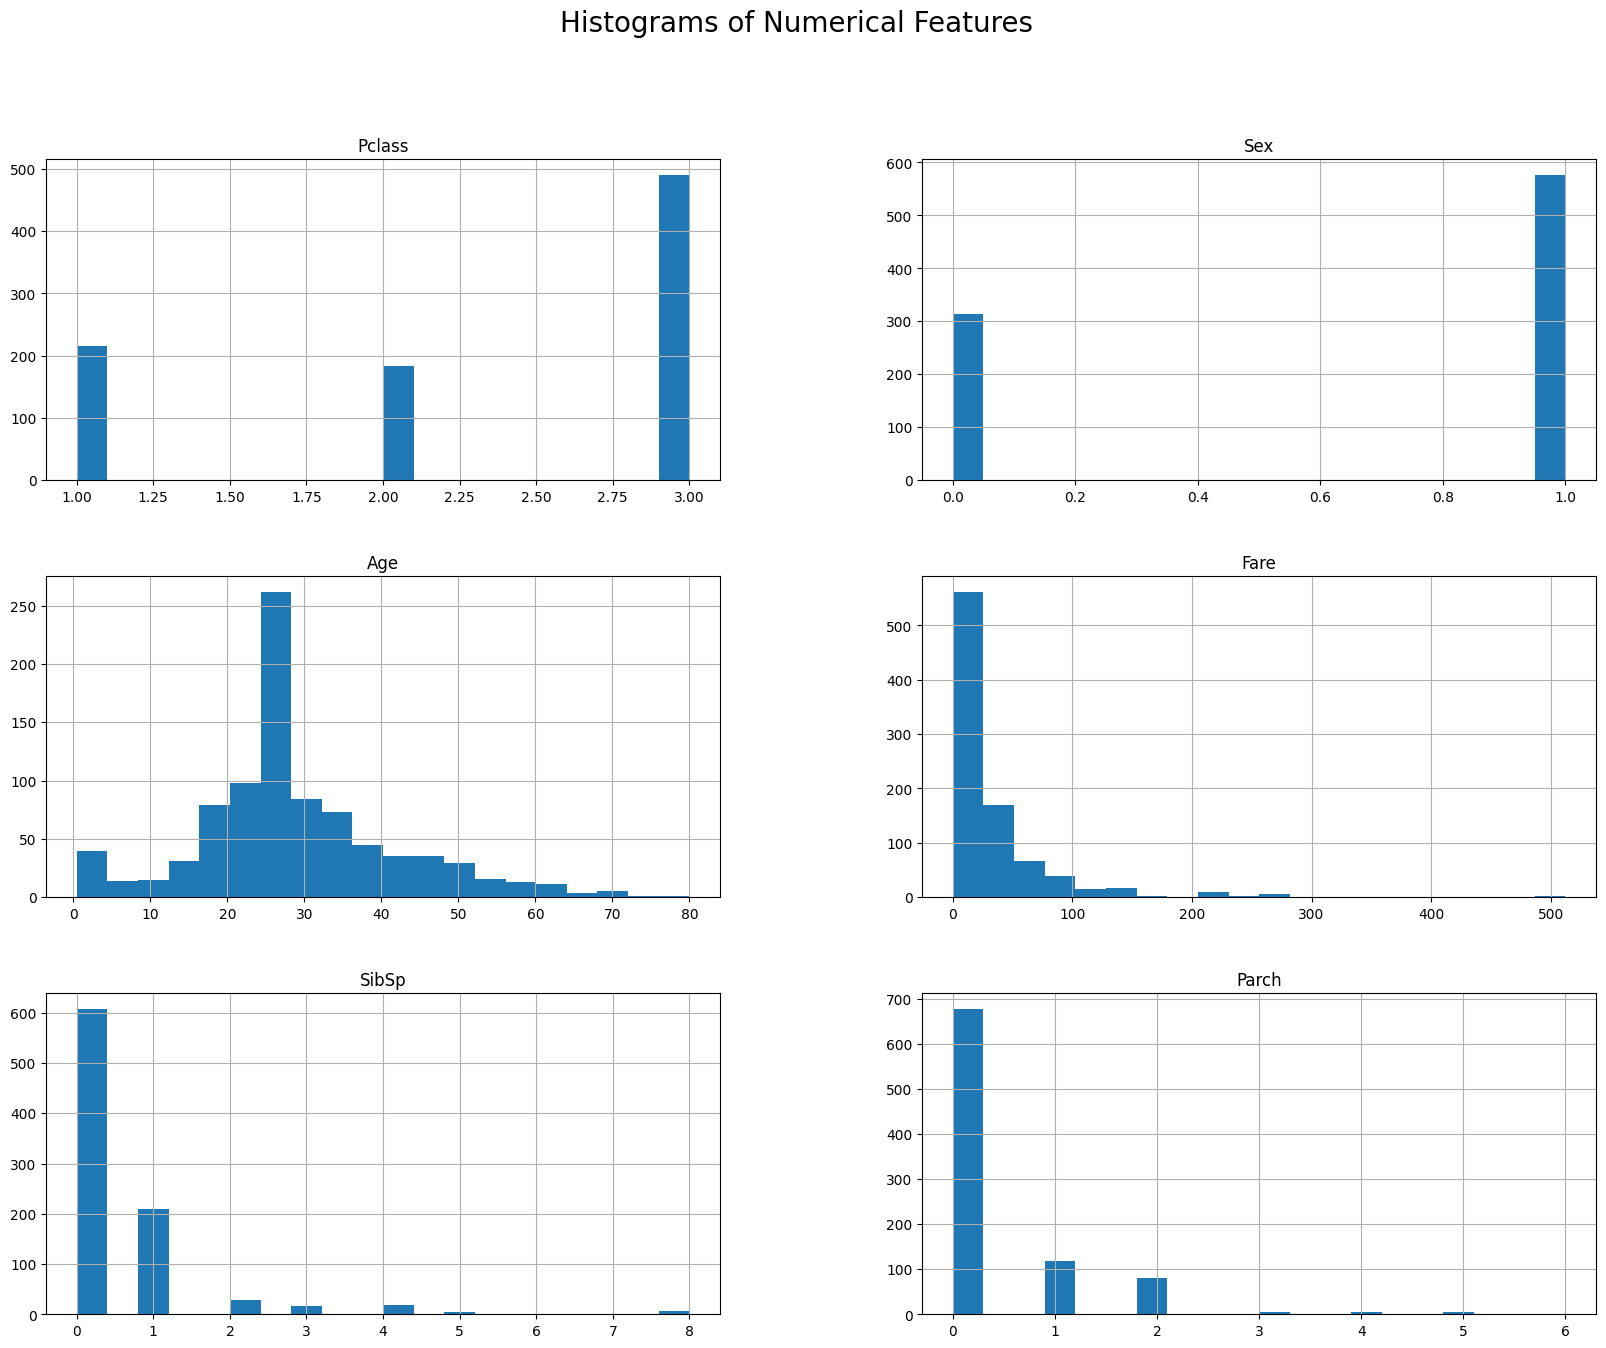

In [145]:
# Plot histograms for numerical features
df[features].hist(bins=20, figsize=(20, 15))
plt.suptitle("Histograms of Numerical Features", fontsize=20)
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

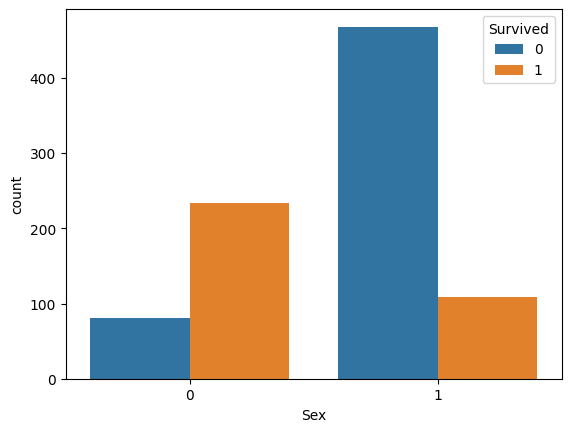

In [146]:
# Survival rate by gender
sns.countplot(x=df['Sex'], hue=df['Survived'])

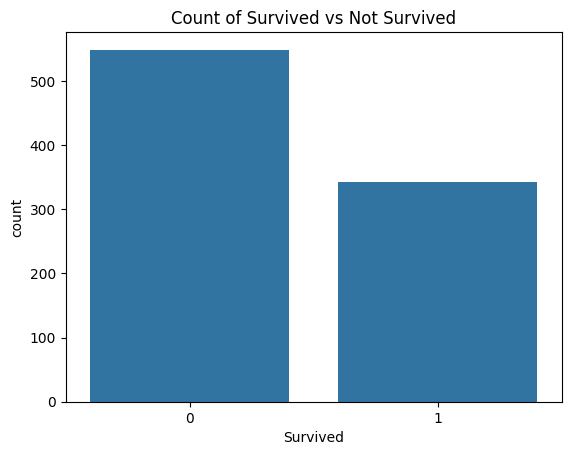

In [147]:
# Plot count plot for 'Survived'
sns.countplot(data=df, x='Survived')
plt.title('Count of Survived vs Not Survived')
plt.show()


<Axes: xlabel='Survived', ylabel='count'>

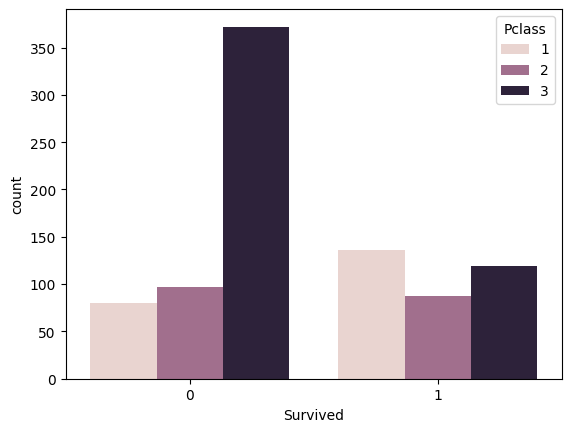

In [148]:
# Survival rate by pclass
sns.countplot(x=df['Survived'], hue=df['Pclass'])

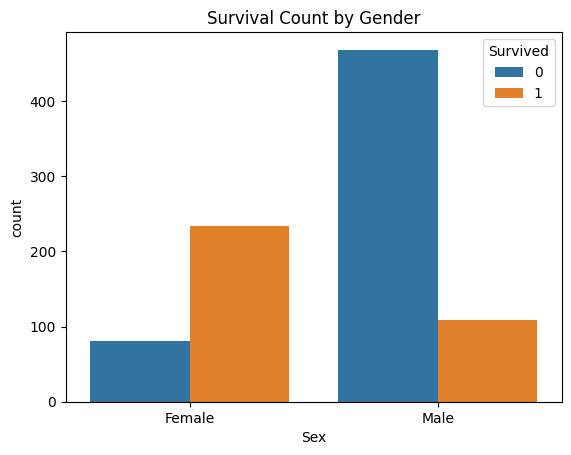

In [149]:
# Plot count plot for 'Sex' with survival
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

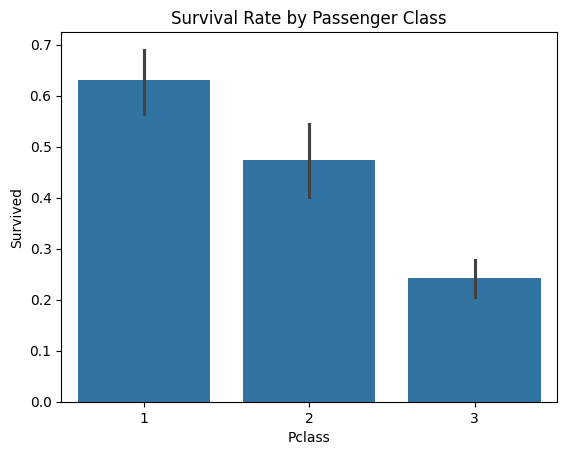

In [150]:
# Plot survival rate by passenger class
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.show()

In [151]:
df.shape

(891, 12)

**Model** **Training**

In [152]:
# Select features for the model
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

In [153]:
# Initialize the logistic regression model
model = LogisticRegression(random_state=42)

In [154]:
# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
print("Model training is complete.")

Model training is complete.


**Model Prediction and Evaluation**

In [157]:
# Predict on the test data
y_pred = model.predict(X_test)

In [158]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6257


In [159]:
# Display the confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[104   1]
 [ 66   8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.99      0.76       105
           1       0.89      0.11      0.19        74

    accuracy                           0.63       179
   macro avg       0.75      0.55      0.47       179
weighted avg       0.73      0.63      0.52       179



**Predicting for a Specific Passenger**

In [160]:
 #Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display the confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7989
Confusion Matrix:
 [[89 16]
 [20 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [162]:
# Predict survival for a new passenger
import warnings
warnings.filterwarnings("ignore")
# Provide all 8 features expected by the model
# Assuming: Pclass=1, Sex=0, Age=30, Fare=75, SibSp=0, Parch=0, Embarked_Q=0, Embarked_S=0
new_passenger = [[1, 0, 30, 75, 0, 0, 0, 0]]  # Corrected to 8 features: Pclass, Sex, Age, Fare, SibSp, Parch, Embarked_Q, Embarked_S

# Predict survival
result = model.predict(new_passenger)

# Interpret the prediction result
if result == 0:
    print("Sorry! The Passenger has not not Survived")
else:
    print("The Passenger has Survived")

The Passenger has Survived


In [164]:
# Predict survival for a new passenger based on PassengerId, Pclass, and Sex
# Example: PassengerId=1, Pclass=1, Sex=0 (Female)
import warnings
warnings.filterwarnings("ignore")
# Provide all 9 features expected by the model
# Assuming: PassengerId=1, Pclass=3, Sex=1, Age=25, Fare=0, SibSp=0, Parch=0, Embarked_Q=0, Embarked_S=0
new_passenger = [[1, 3, 25, 0, 0, 0, 0, 0]]  # Adjust values as needed

# Predict survival
result = model.predict(new_passenger)

# Interpret the prediction result
if result == 0:
    print("Sorry! The Passenger has not not Survived")
else:
    print("The Passenger has Survived")

Sorry! The Passenger has not not Survived
